# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 2

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP2. Este Jupyter Notebook debe estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [106]:
# Primero instalamos las librerías necesarias para leer y manipular la base de datos
%pip install pyod 
#Este paquete lo vamos a usar para calcular el MAD, lo cual va a ser necesario para eliminar los outliers.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Note: you may need to restart the kernel to use updated packages.


In [107]:
# Abrimos la carpeta donde se encuentra la base de datos
os.chdir(r"c:\Users\s1248850\OneDrive - Syngenta\Documents\Rosario Luque\Ciencias de datos\TP\TP2")
# Guardamos la base de datos en la variable df y mostramos las primeras 5 filas
df = pd.read_csv("Base Airbnb NY.csv")
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0


#### 1. Tengan en cuenta si hay valores duplicados y eliminénlos.

In [108]:
# Ahora sí, comenzamos a limpiar. Primero revisamos si hay valores duplicados y los eliminamos.
# Antes, queremos saber cuantas filas tiene la base original, para ello usamos la función shape.
df.shape

(48905, 16)

In [109]:
df = df.drop_duplicates() # La función drop_duplicates elimina los valores duplicados
df.shape # Ahora vemos que la base tiene 48895 filas, es decir, habían 10 filas duplicadas.


(48895, 16)

#### 2. Eliminen las columnas que no tienen información de interés.

In [110]:
# Segundo, eliminamos las columnas que no tienen información de interés.
df = df.drop(columns=['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'last_review'])
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0


In [111]:
# Verificar las clases de las variables que fueron retenidas después de la limpieza
df.dtypes

neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#### 3. Decidan qué hacer con los missing values e implementen su decision.

In [112]:
# Tercero, antes de decidir que hacer con los missing values, miramos cuantos hay por columna.
# Primero, vemos cuántos missing values hay en cada columna.
df.isnull().sum()
# Vemos que hay missing values en las columnas 'price' (15) y 'reviews_per_month' (10052).

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data
However, if your purpose is prediction, you would want your standard error to be reduced by including information (non-missing data) on other variables of a data point. Then imputation could be the tool that you’re looking for.

https://www.machinelearningplus.com/machine-learning/mice-imputation/

In [113]:
#Dado que no sabemos si los missing values son aleatorios o no, decidimos imputarlos con la mediana.
#df['price'] = df['price'].fillna(df['price'].median())
#df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())
#df.isnull().sum()


In [114]:
# Dado que imputar por la mediana luego hace que el MSE sea exageradamente grande, optamos por eliminar las filas con missing values.
df = df.dropna()
df.isnull().sum()
df.shape #Finalmente, luego de eliminar los datos con missing values, la base tiene 38821 filas.

(38831, 10)

#### 4. Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. 

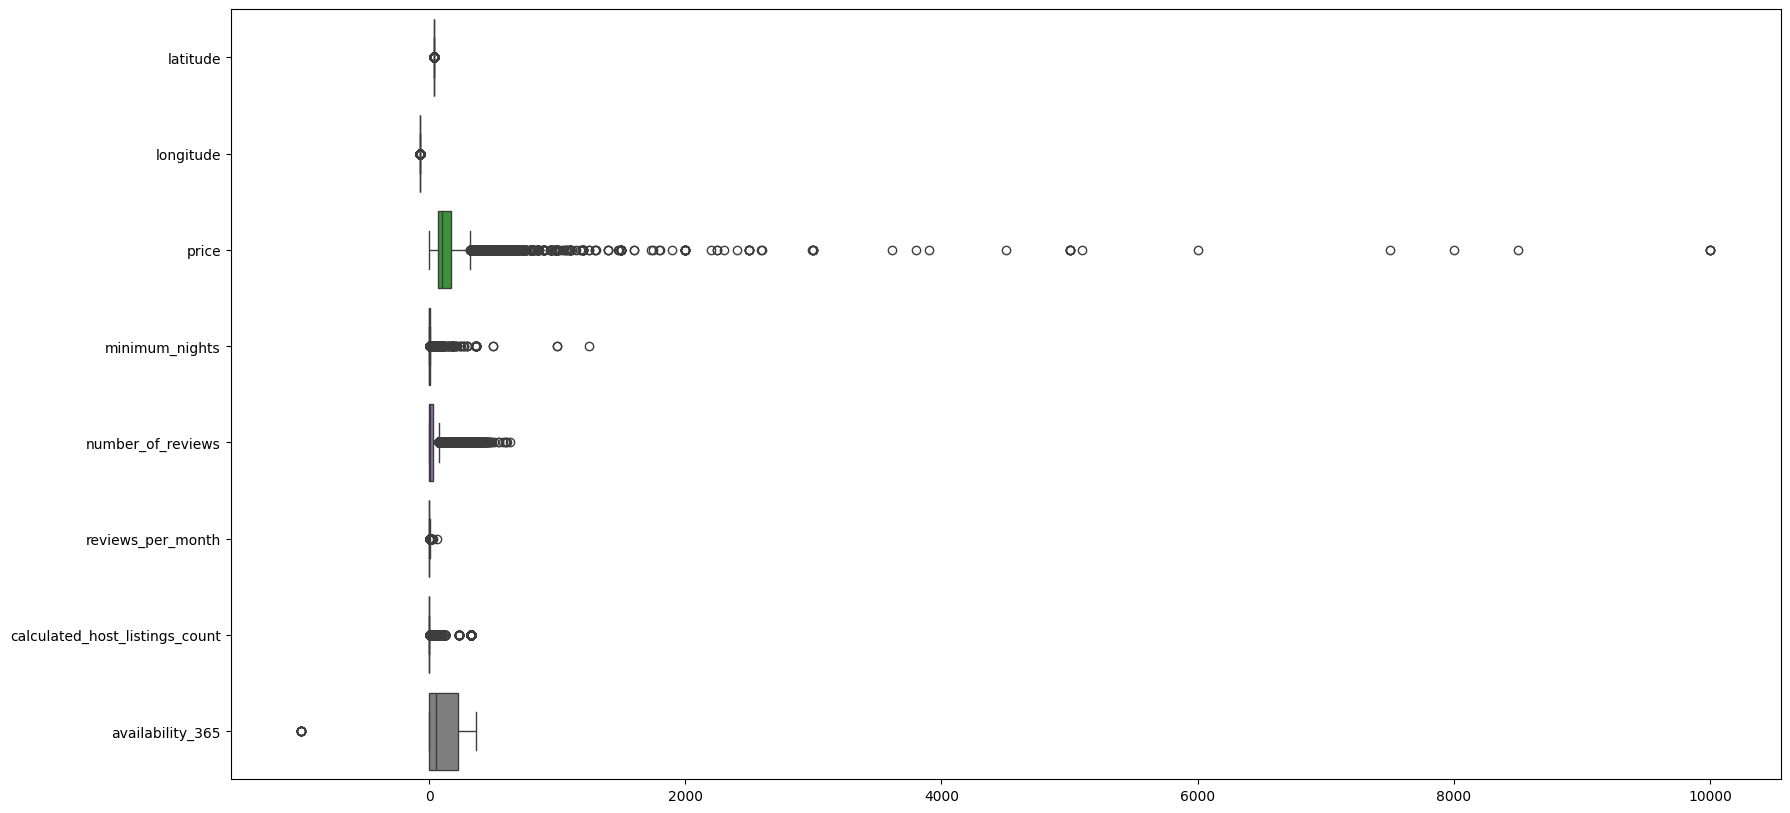

In [115]:
# Ahora si, una vez elimainadas las filas correspondientes, procedemos a hacer un análisis de los outliers
# Lo primero que debemos hacer es plotear boxplots para ver la distribución de las variables.
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="h")
plt.show()

In [116]:
# Lo primero que notamos es que la variable "avaibility_365" tiene un valor negativo y varios que valen 0.
# Entonces, condicionamos a que el valor sea mayor a 0.
df = df[df['availability_365'] > 0]


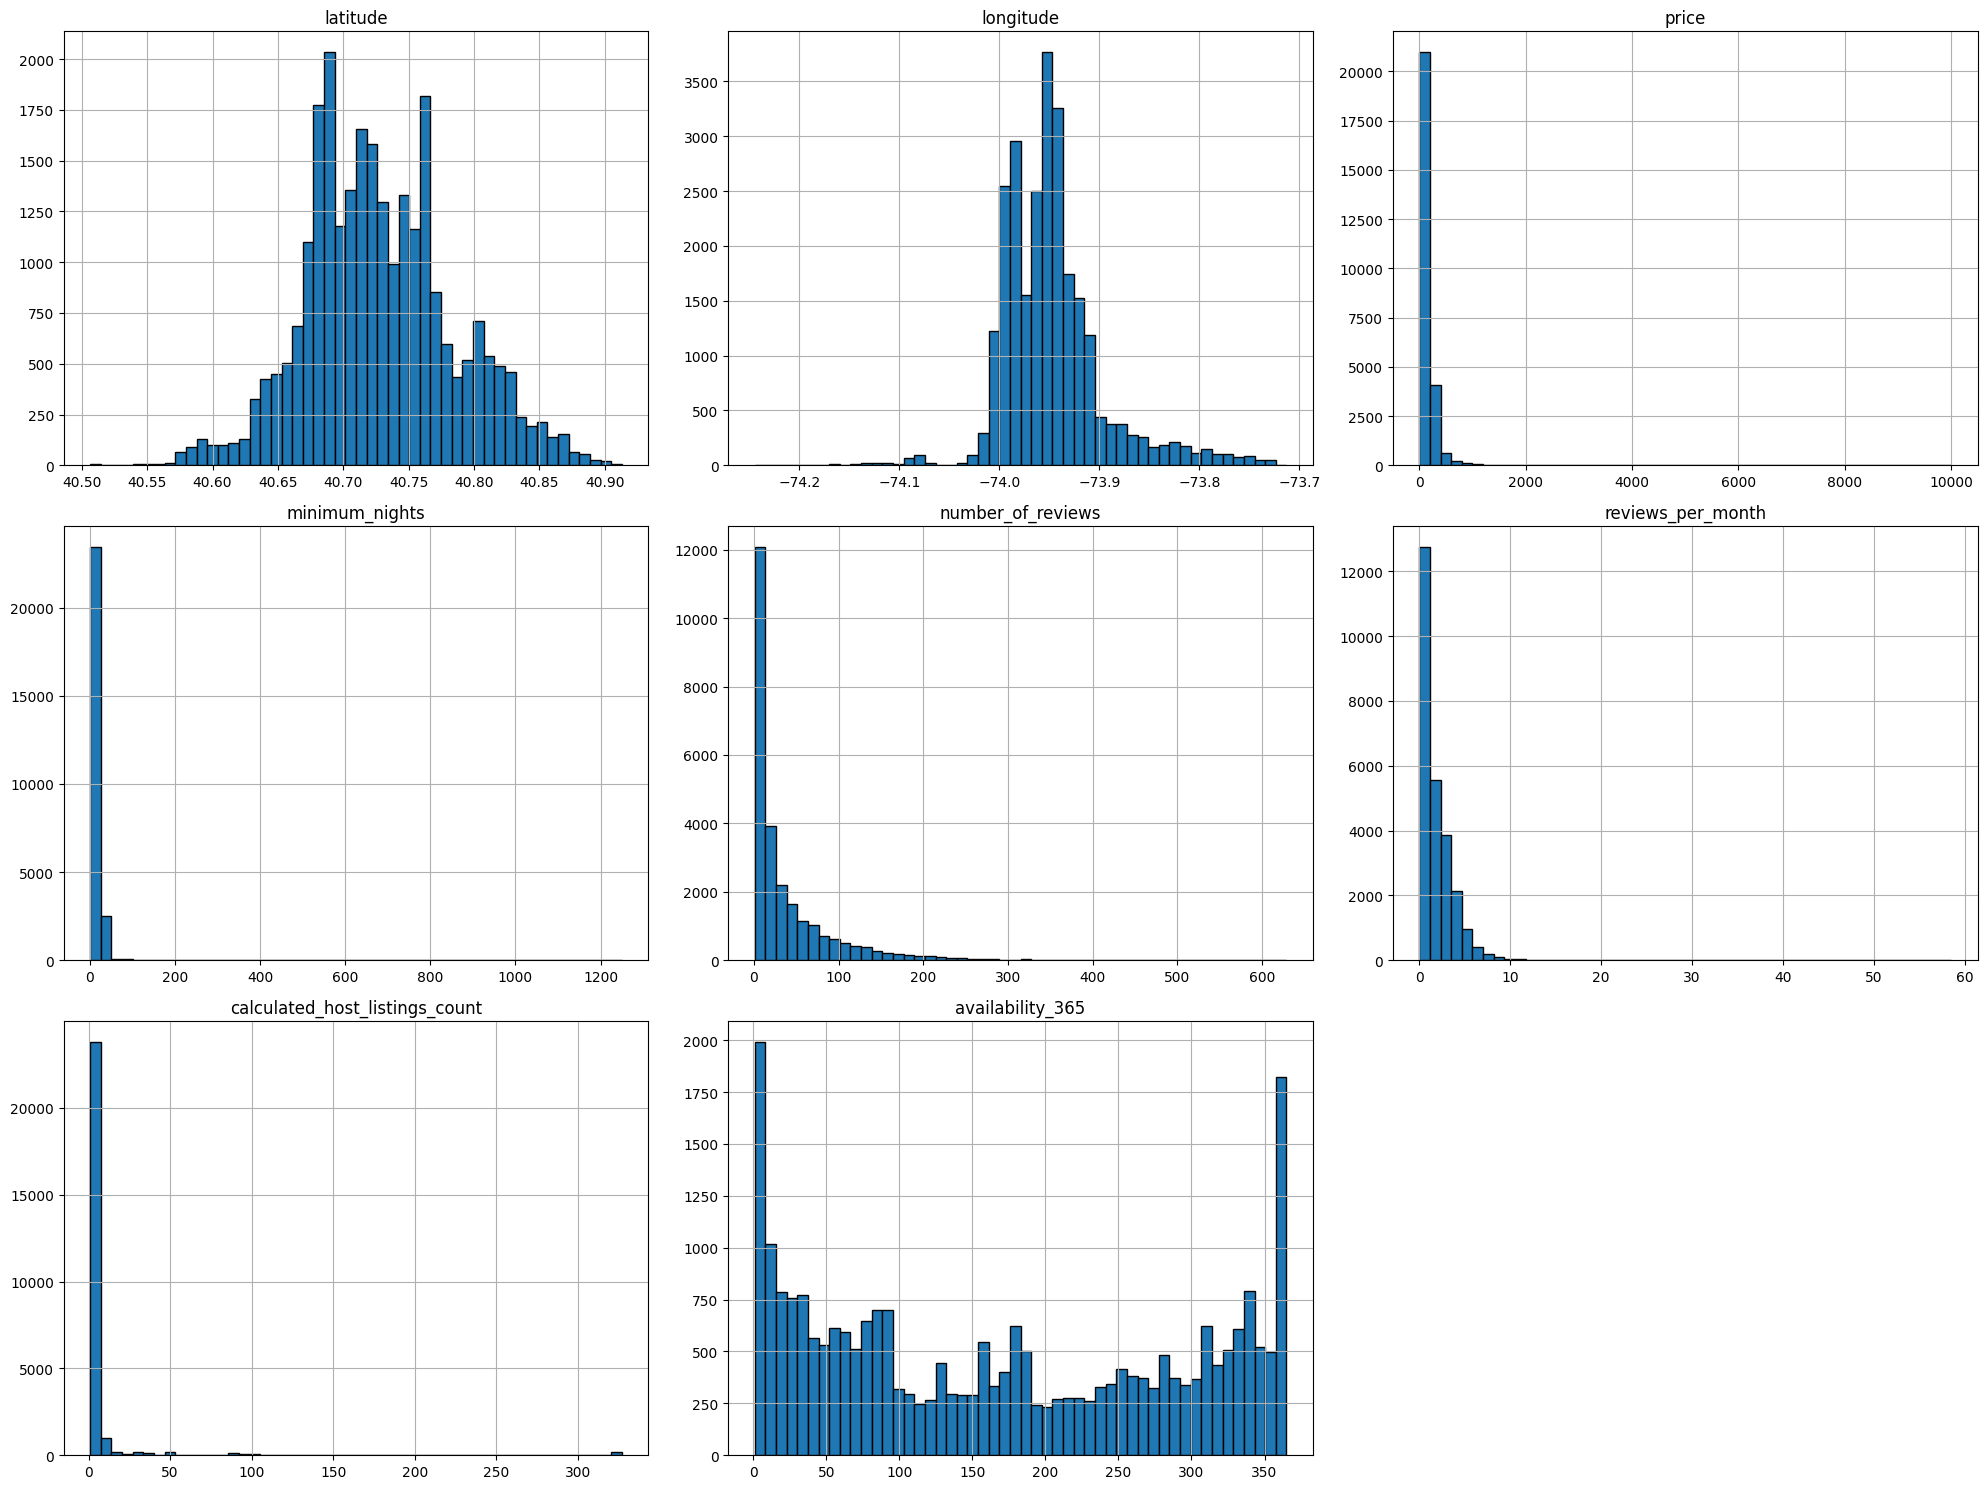

In [117]:
# Otra herramienta útil para ver la distribución de las variables es el histograma.
#El histograma nos permite ver si es necesario transformar alguna variable.
df.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()
# Las variables latitude y longitud parecieran seguir una distribución más o menos normal.
# La variable price, que es la variable que luego vamos a predecir, tiene una distribución asimétrica a la derecha.
# Vemos que 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' tienen muchos ceros. 
# Por lo tanto, vamos a transformar estas variables y luego quitar outliers.
# La variable 'availability_365' también la vamos a transformar.


In [118]:
# CORRER UNA SOLA VEZ
# Apply log transformation to the specified columns
columns_to_transform = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

# Transform the columns using numpy.log
for column in columns_to_transform:
    df[column] = np.log(df[column] + 1)  # Adding 1 to avoid log(0)

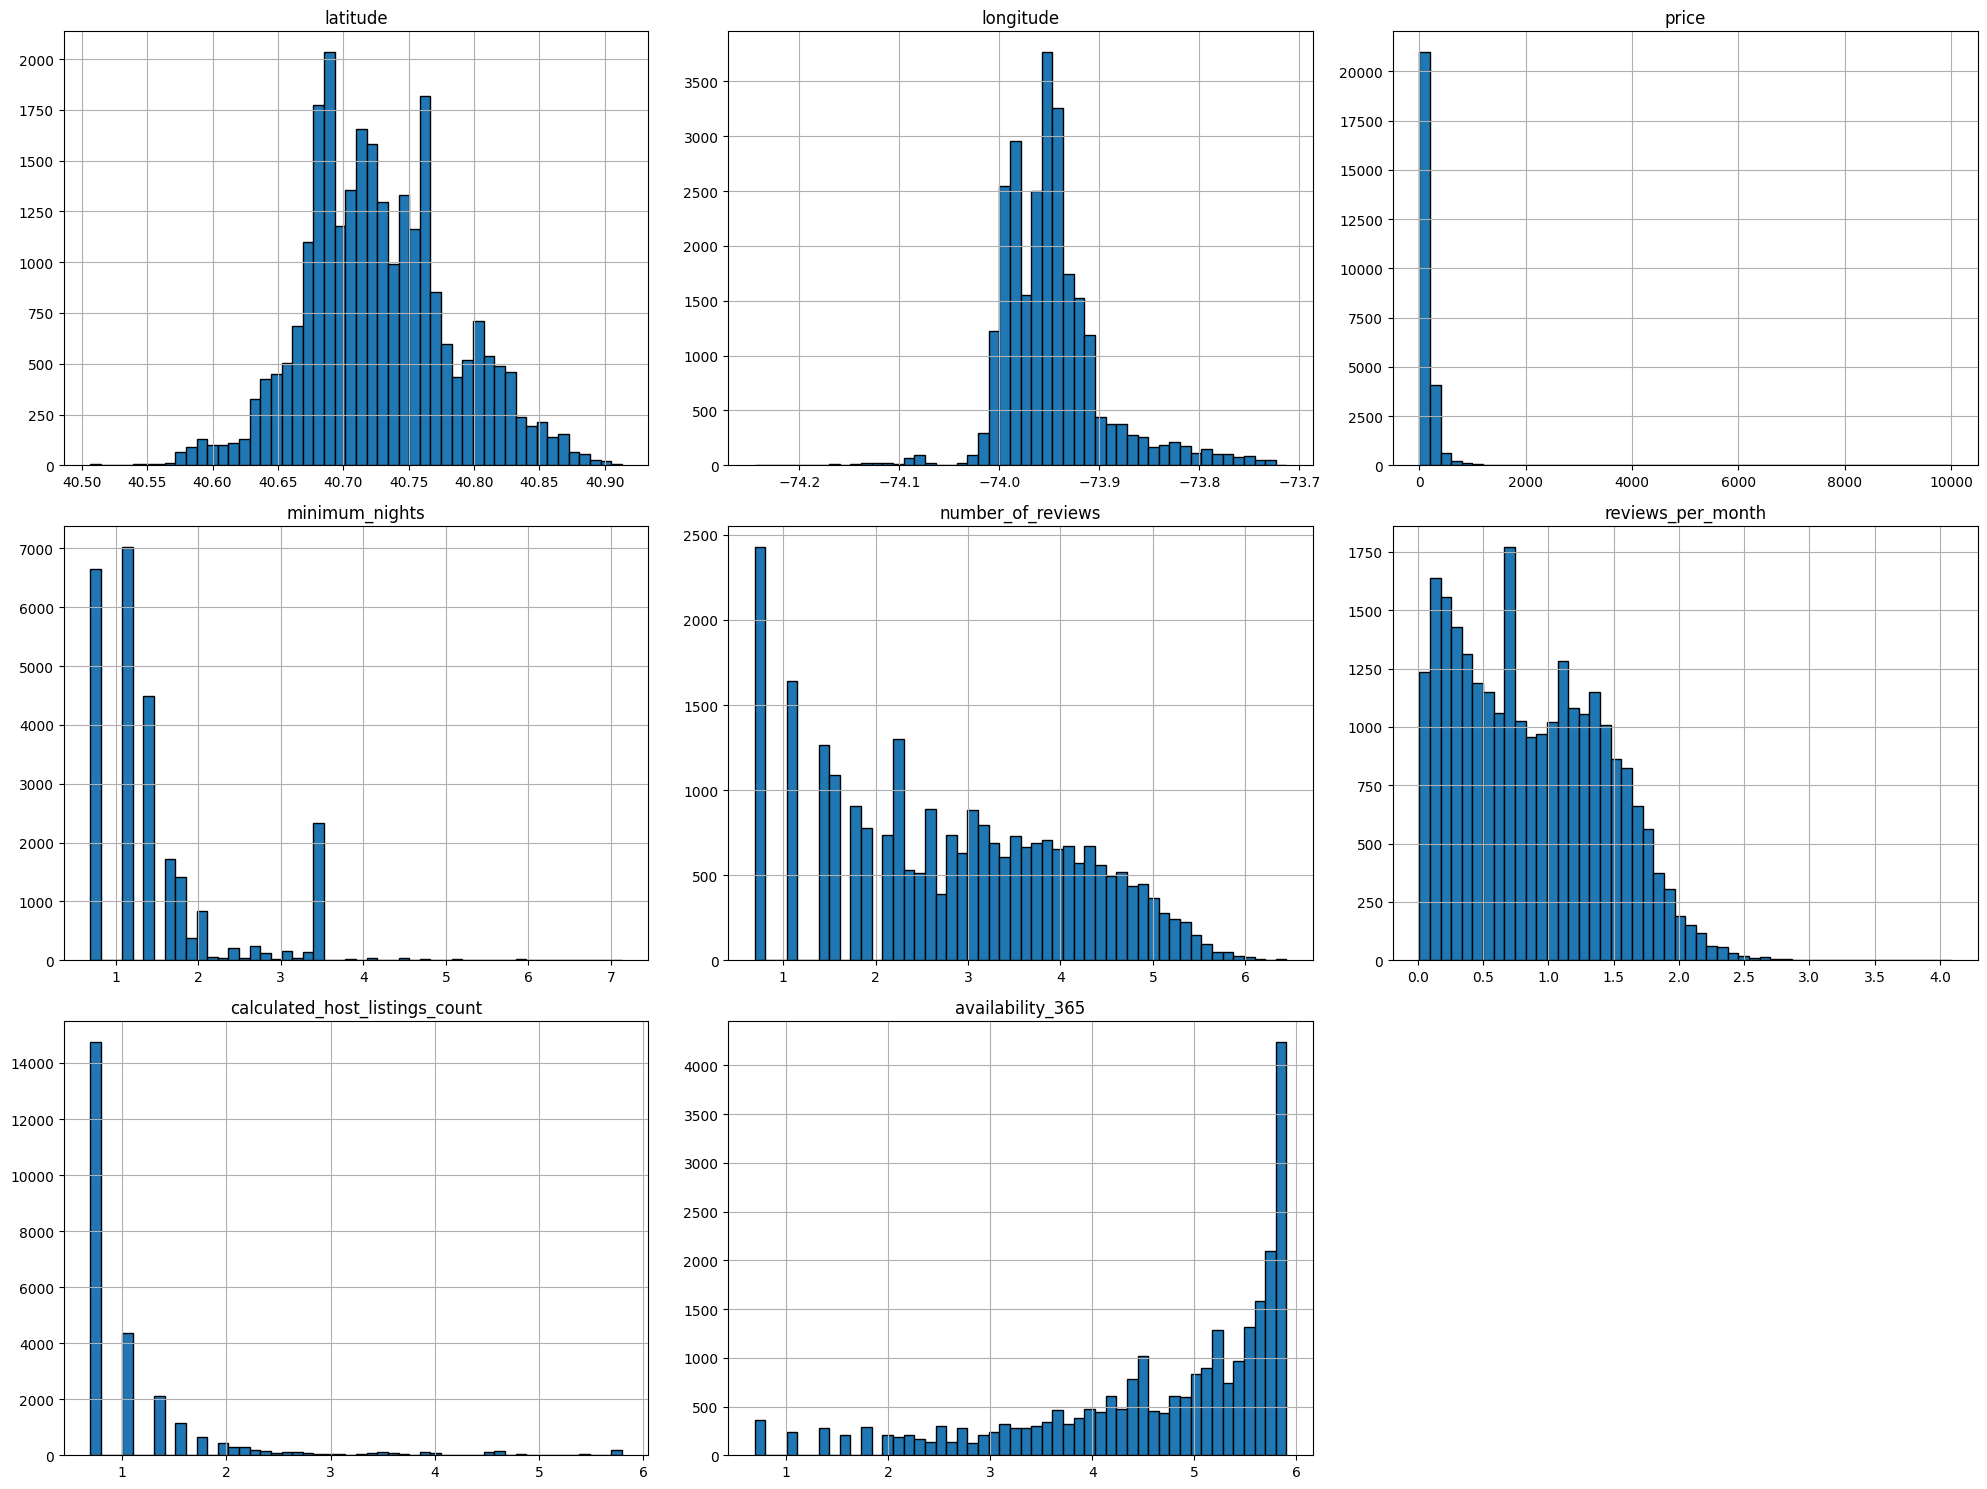

In [119]:
df.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3

In [120]:
# Ahora sí, vamos a proceder a identificar los outliers de cada columna.
# Para ello, vamos a usar el método de la desviación absoluta media (MAD).
# Sin embargo, vamos a quitar la columna de calculated_host_listings_count, dado que esto
# haría que eliminemos todos los valores que sean distintos de 1 para esta columna, lo cual significaría perder mucha información.
# Import MAD estimator
from pyod.models.mad import MAD

# Se suele utilizar un umbral de 3.5 para considerar que un punto de datos es un outlier.
mad = MAD(threshold = 3.5)
columns_with_outliers = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'price', 'availability_365']

for column in columns_with_outliers:
    # Para calcular el Z-score modificado, primero debemos tranformar las columnas en 2D numpy arrays.
    total_reshaped = df[column].values.reshape(-1, 1)

    # Clasificamos los puntos de datos en outliers (1) y no outliers (0)
    labels = mad.fit(total_reshaped).labels_
    print(f'Outliers for {column}: {np.sum(labels == 1)}')

Outliers for minimum_nights: 2741
Outliers for number_of_reviews: 0
Outliers for reviews_per_month: 2
Outliers for price: 1349
Outliers for availability_365: 885


In [121]:
# Por último, filtramos los outliers de cada columna y nos quedamos con un nuevos df.
df_filtrado = df.copy()
df_filtrado = df_filtrado[labels == 0]
df_filtrado.shape
df_filtrado.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149.0,0.693147,2.302585,0.190620,1.945910,5.902633
1,Manhattan,40.75362,-73.98377,Entire home/apt,225.0,0.693147,3.828641,0.322083,1.098612,5.874931
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89.0,0.693147,5.602119,1.729884,0.693147,5.273000
5,Manhattan,40.74767,-73.97500,Entire home/apt,200.0,1.386294,4.317488,0.463734,0.693147,4.867534
7,Manhattan,40.76489,-73.98493,Private room,79.0,1.098612,6.066108,1.497388,0.693147,5.398163


In [122]:
df_filtrado.shape # Luego de eliminar los outliers, la base tiene 25249 filas.

(25249, 10)

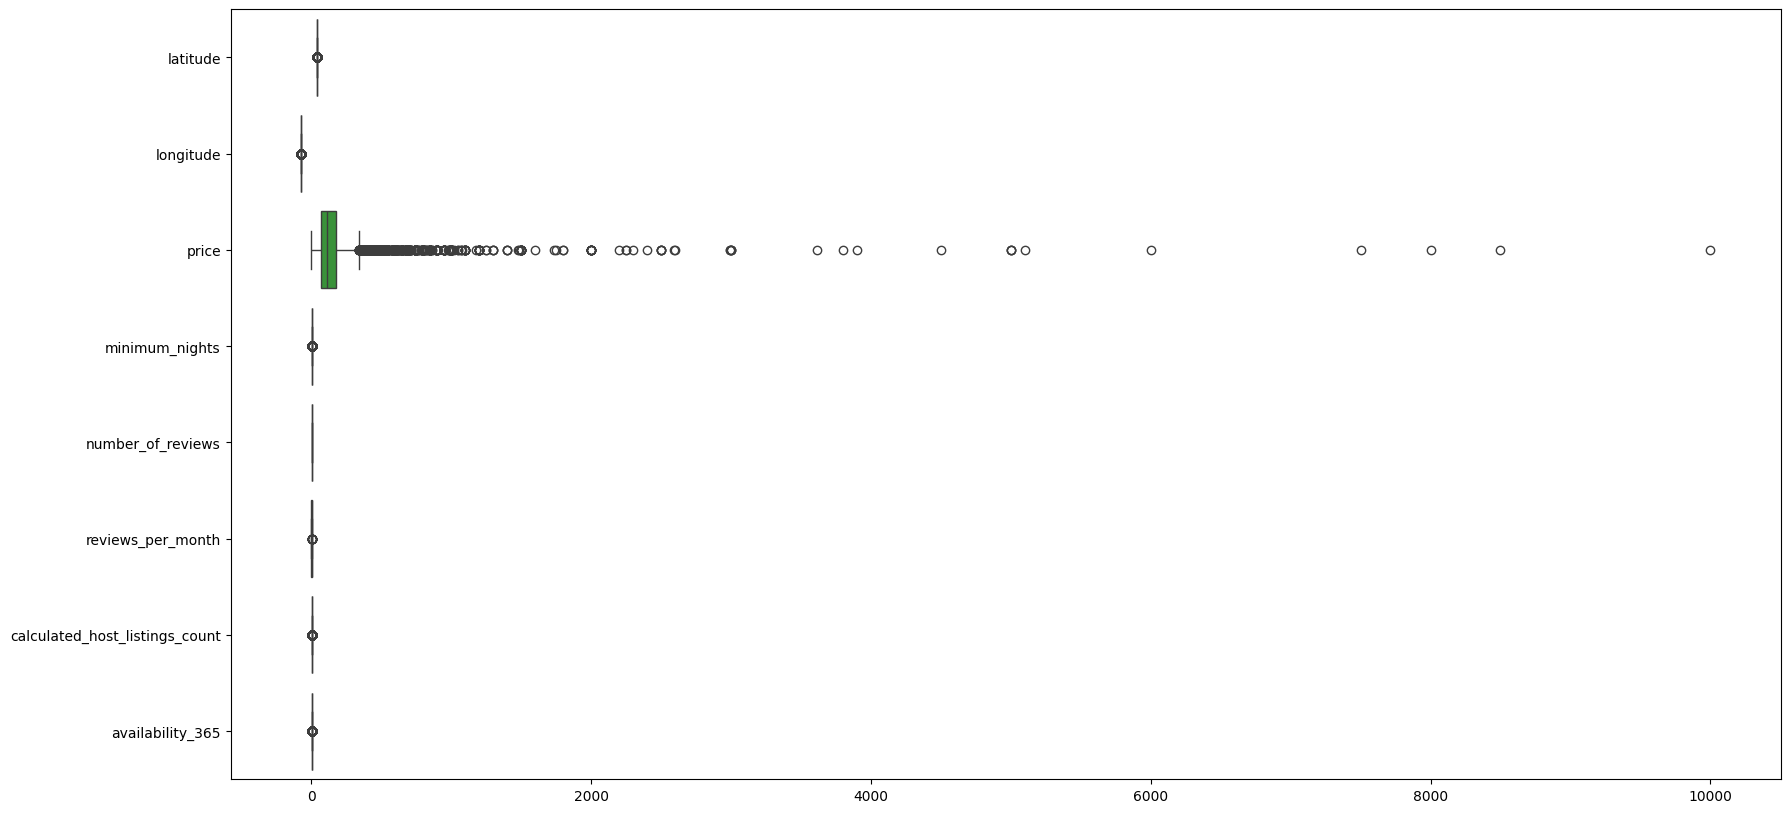

In [123]:
# Ploteamos una vez más los boxplots para ver como quedaron las distribuciones.
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_filtrado, orient="h")
plt.show()

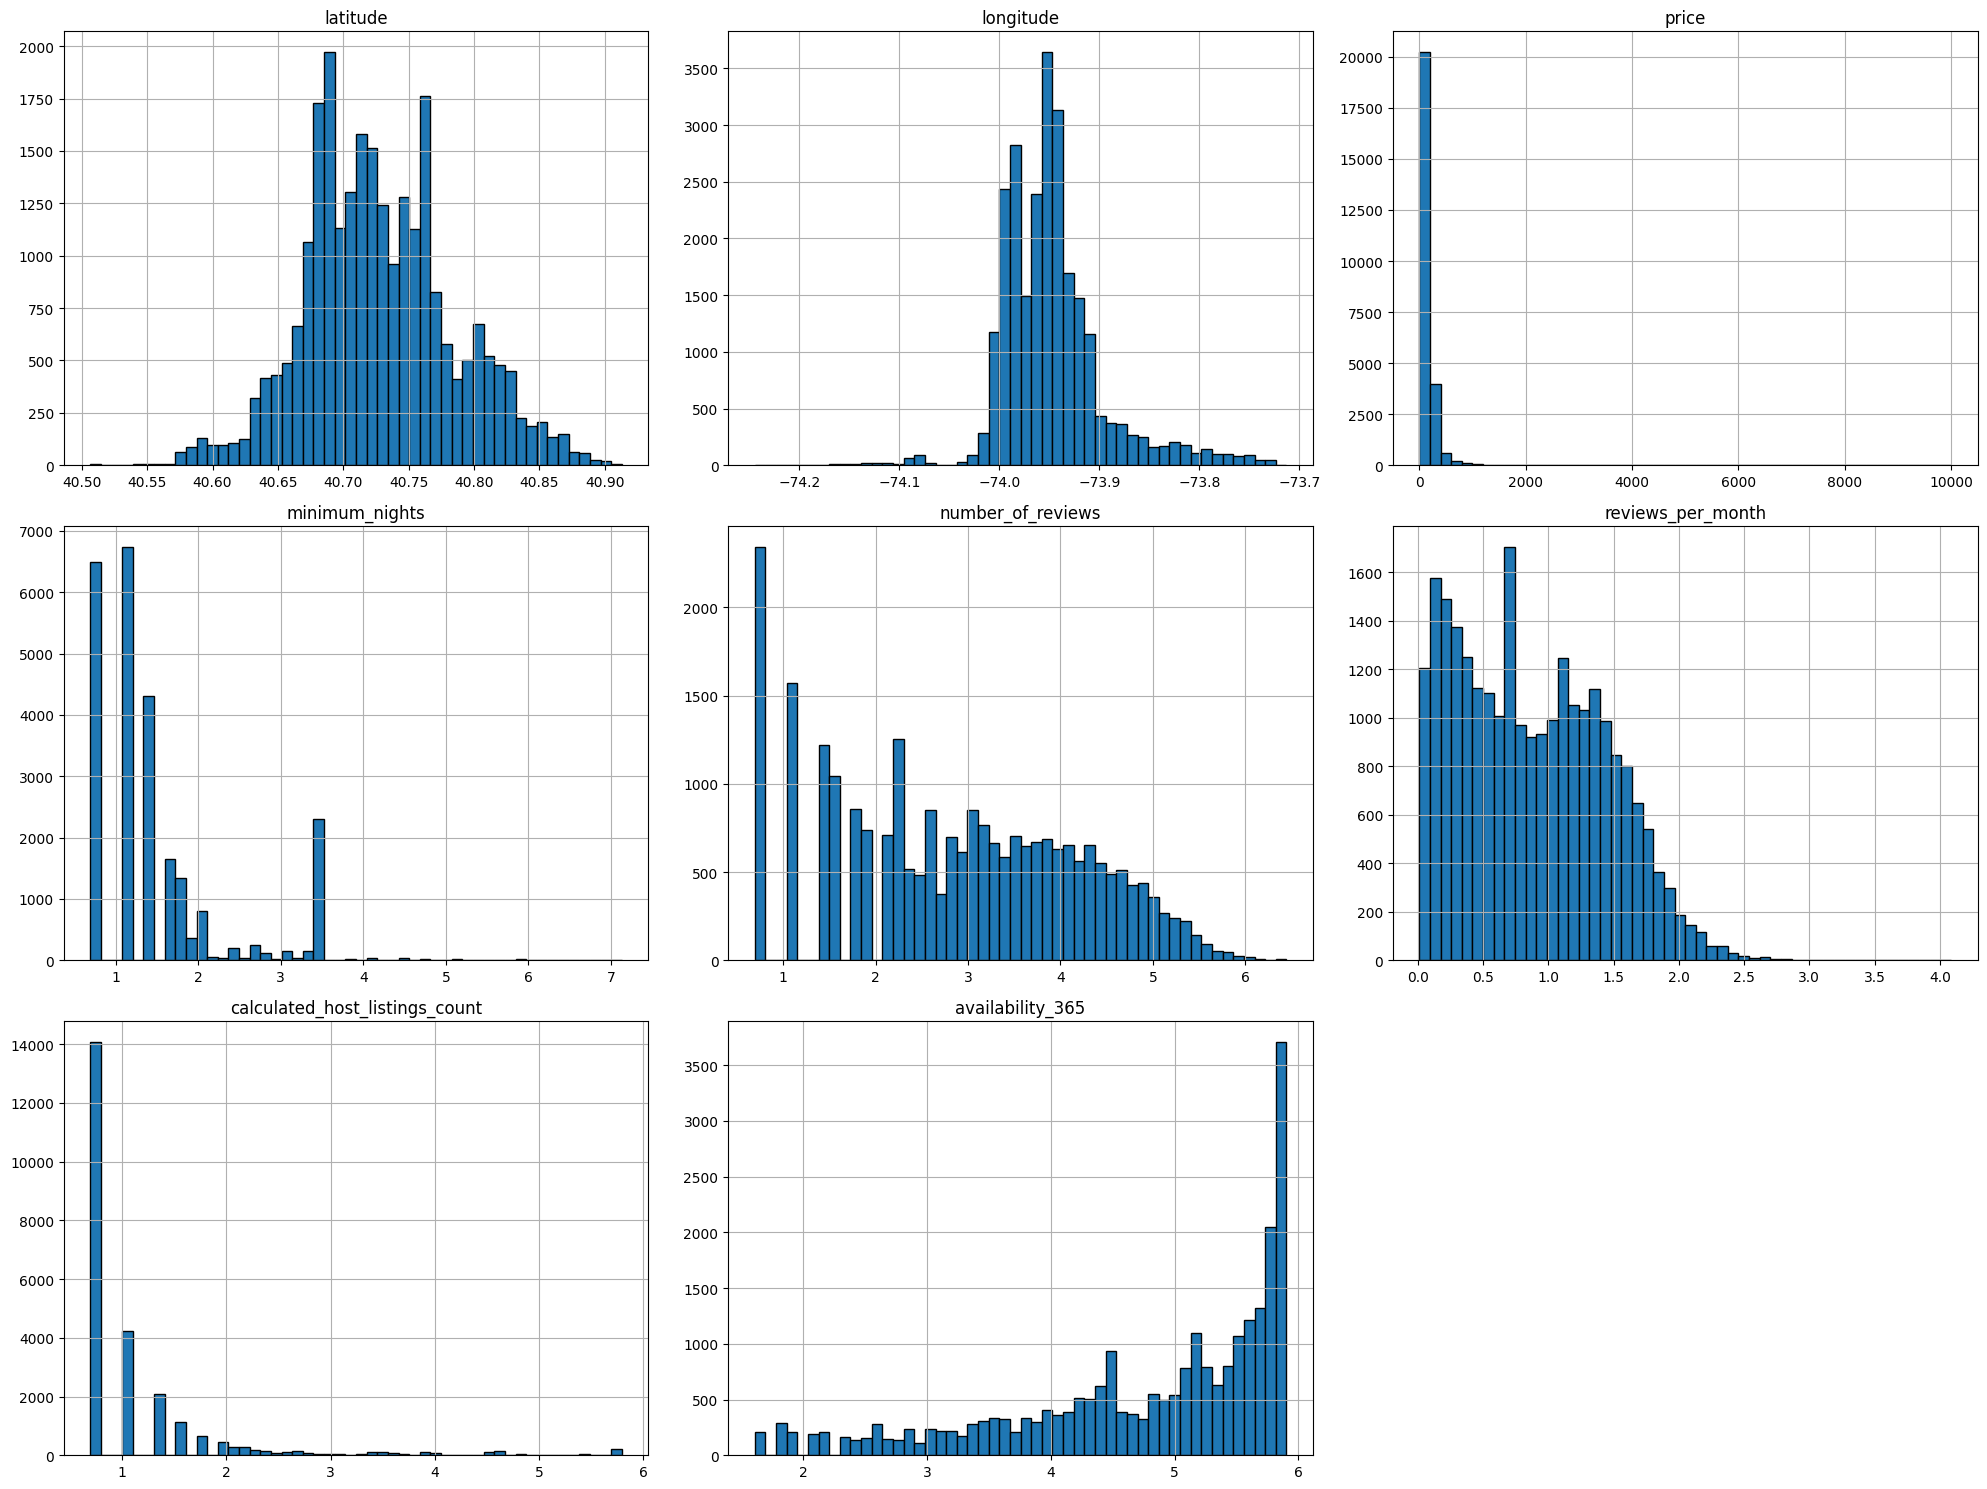

In [124]:
# También ploteamos los histogramas
df_filtrado.hist(figsize=(20, 15), bins=50, edgecolor='black')
plt.tight_layout()
plt.show()

#### 5. Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.

In [125]:
# Antes de transformar las variables, nos sirve conocer las distintas categorías que toma cada variable.
# Para ello, uso la función value_counts.
print(df_filtrado['neighbourhood_group'].value_counts())
df_filtrado['room_type'].value_counts()

neighbourhood_group
Manhattan        10398
Brooklyn         10278
Queens            3545
Bronx              741
Staten Island      287
Name: count, dtype: int64


room_type
Entire home/apt    13141
Private room       11453
Shared room          655
Name: count, dtype: int64

In [126]:
from sklearn.preprocessing import LabelEncoder

# Transformamos las variables 'neighbourhood_group' y 'room_type' a variables numéricas usando LabelEncoder

# Creamos un objeto LabelEncoder
label_encoder = LabelEncoder()

# Transformamo 'neighbourhood_group'
df_filtrado['neighbourhood_group'] = label_encoder.fit_transform(df_filtrado['neighbourhood_group'])

# Transformamos 'room_type'
df_filtrado['room_type'] = label_encoder.fit_transform(df_filtrado['room_type'])


# Ahora Manhattan es 2, Brooklyn es 1, Queens es 3, Bronx es 0 y Staten Island es 4.
# Ahora Entire home/apt es 0, Private room es 1 y Shared room es 2.

#### 6. Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [127]:
# CORRER UNA SOLA VEZ
# Creamos una columna que tenga la cantidad de oferentes por “Neighbourhood group”
offer_group = df_filtrado.groupby('neighbourhood_group').size().reset_index(name='offer_group')

# Unimos la nueva columna al DataFrame original
df_filtrado = df_filtrado.merge(offer_group, on='neighbourhood_group', how='left')

df_filtrado.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,offer_group
0,1,40.64749,-73.97237,1,149.0,0.693147,2.302585,0.190620,1.945910,5.902633,10278
1,2,40.75362,-73.98377,0,225.0,0.693147,3.828641,0.322083,1.098612,5.874931,10398
2,1,40.68514,-73.95976,0,89.0,0.693147,5.602119,1.729884,0.693147,5.273000,10278
3,2,40.74767,-73.97500,0,200.0,1.386294,4.317488,0.463734,0.693147,4.867534,10398
4,2,40.76489,-73.98493,1,79.0,1.098612,6.066108,1.497388,0.693147,5.398163,10398


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [128]:
# Resolver acá


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [129]:
# Resolver acá
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [130]:
df_filtrado['neighbourhood_group'] = label_encoder.fit_transform(df_filtrado['neighbourhood_group'])

# Transformar 'room_type'
df_filtrado['room_type'] = label_encoder.fit_transform(df_filtrado['room_type'])

In [131]:
# Lo primero que debemos hacer es escalar las variables, dado que PCA es sensible a la escala de las variables.

# Inicializamos el transformador
scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform al DataFrame
df_transformado = pd.DataFrame(scaler.fit_transform(df_filtrado), columns=df_filtrado.columns)
print(df_transformado.mean()) 
print(df_transformado.std()) 
display(df_transformado.head())

neighbourhood_group              -7.288628e-17
latitude                         -1.777103e-14
longitude                         2.047981e-13
room_type                        -1.041233e-17
price                             4.924749e-17
minimum_nights                    4.727759e-16
number_of_reviews                 2.116235e-16
reviews_per_month                -8.780123e-17
calculated_host_listings_count    2.667807e-16
availability_365                 -1.077816e-16
offer_group                      -7.879598e-17
dtype: float64


neighbourhood_group               1.00002
latitude                          1.00002
longitude                         1.00002
room_type                         1.00002
price                             1.00002
minimum_nights                    1.00002
number_of_reviews                 1.00002
reviews_per_month                 1.00002
calculated_host_listings_count    1.00002
availability_365                  1.00002
offer_group                       1.00002
dtype: float64


,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,offer_group
0,-0.886565,-1.399154,-0.480463,0.900080,-0.007802,-0.908678,-0.406915,-1.213731,0.901291,1.026760,0.441928
1,0.384725,0.459473,-0.700161,-0.920049,0.369005,-0.908678,0.723622,-0.979604,-0.087786,1.001976,0.483058
2,-0.886565,-0.739799,-0.237447,-0.920049,-0.305280,-0.908678,2.037454,1.527589,-0.561098,0.463468,0.441928
3,0.384725,0.355272,-0.531148,-0.920049,0.245056,-0.095601,1.085771,-0.727334,-0.561098,0.100724,0.483058
4,0.384725,0.656841,-0.722516,0.900080,-0.354860,-0.433059,2.381188,1.113531,-0.561098,0.575443,0.483058


In [132]:
# Una vez estandarizadas las variables procedemos a aplicar PCA.
# Inicializamos el PCA
pca = PCA()
airbnb_pca = pca.fit_transform(df_transformado)

In [133]:
# Ahora vemos la varianza explicada por cada componente
print("Varianza explicada:", pca.explained_variance_ratio_)

Varianza explicada: [0.20055644 0.16380445 0.11618332 0.10741864 0.0878671  0.07601156
 0.07278138 0.06183318 0.0480637  0.03353863 0.0319416 ]


In [147]:
%%capture 
fig, axes = plt.subplots(1, 2, figsize=(10, 4)) # 2 subplots uno al lado del otro
ticks = np.arange(pca.n_components_)+1 # para crear ticks en el eje horizontal
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Componente principal');
ax.set_ylabel('Proporción de la varianza explicada por cada componente')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
# capture suprime la visualización de la figura parcialmente terminada



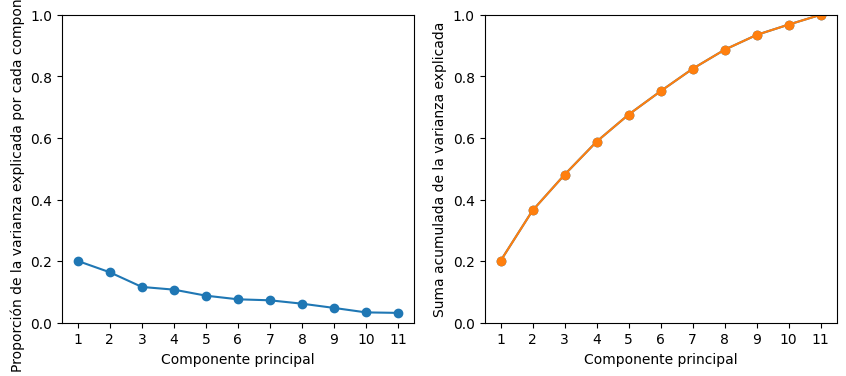

In [148]:
ax = axes[1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o') 
ax.set_xlabel('Componente principal')
ax.set_ylabel('Suma acumulada de la varianza explicada')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

In [144]:
# Ahora vemos los loadings de cada componente
loading_vectors = pca.components_ # cada fila corresponde a un CP y cada columna, a una variable
print("Loadings:\n", pca.components_*-1)
print("Loadings del CP1:\n",pca.components_[0]*-1) 
pca.components_[0,0] #loadings del CP1 variable 1

Loadings:
 [[-0.1865939  -0.06070954 -0.36362495 -0.21796445  0.21299138  0.43692055
  -0.38454653 -0.46067971  0.21217665  0.0237288   0.37392077]
 [ 0.39427018  0.23898463  0.34501326  0.17936625 -0.10641674  0.23403178
  -0.3419576  -0.30599721  0.31605774  0.22081585 -0.4592539 ]
 [-0.40681871 -0.29635179  0.07611317  0.56213649 -0.59099257 -0.02897771
  -0.14981628 -0.15704249  0.07616994 -0.0620099   0.13422828]
 [ 0.05311443  0.16944349  0.10988885 -0.07089563 -0.03989829 -0.05019262
  -0.32110133 -0.25964589 -0.51774927 -0.70456877 -0.11068568]
 [-0.11559816 -0.75012964  0.34861747 -0.29835021  0.18516797 -0.05119639
  -0.14613761 -0.12323242 -0.19027778  0.1820227  -0.26571981]
 [ 0.04149634  0.01111564 -0.1361985   0.48149597  0.53839175 -0.55888179
  -0.32614664 -0.10040329 -0.04040788  0.14954707  0.07142818]
 [-0.6105077   0.47731801  0.44221077 -0.04405767  0.15532182  0.06631656
   0.04901211 -0.1026596  -0.24278391  0.31423174  0.05297995]
 [ 0.26522065 -0.00159692 -0.3

0.1865939036548543

In [135]:
#Si calculamos la norma euclídea de los loadings de cada componente, podemos ver que la suma de los cuadrados de los loadings de cada componente es igual a 1.
(loading_vectors[0,0])**2+(loading_vectors[0,1])**2+(loading_vectors[0,2])**2+(loading_vectors[0,3])**2+(loading_vectors[0,4])**2+(loading_vectors[0,5])**2+(loading_vectors[0,6])**2+(loading_vectors[0,7])**2+(loading_vectors[0,8])**2+(loading_vectors[0,9])**2+(loading_vectors[0,10])**2

0.9999999999999997

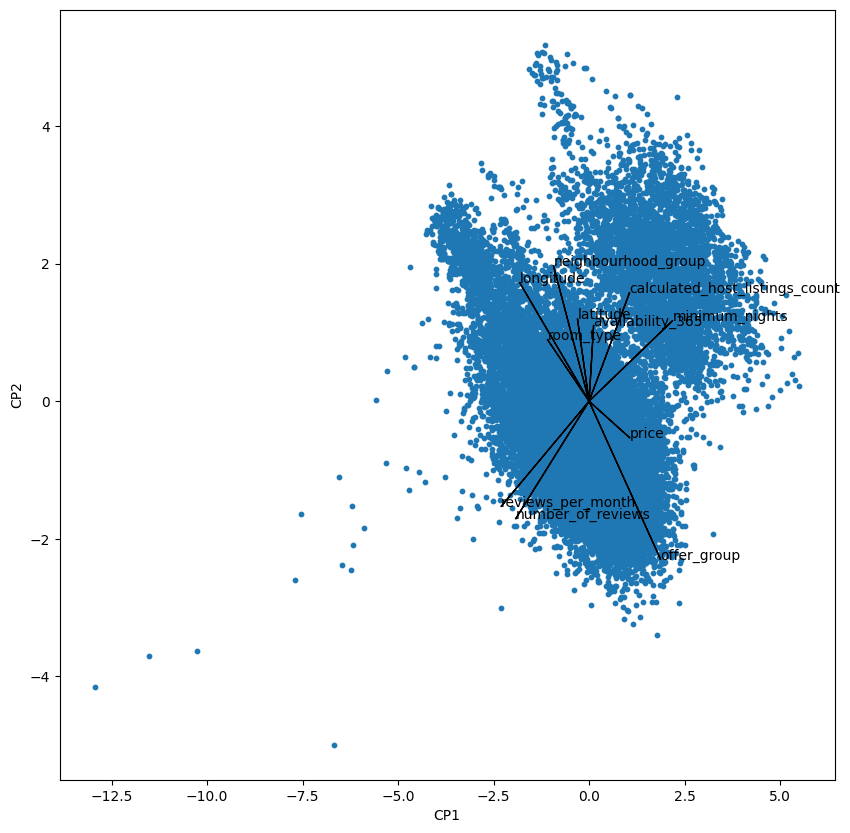

In [146]:
# Hacemos el Biplot para ver el gráfico de las variables en dos dimensiones
scores = airbnb_pca

# Increase visibility of arrows and variable names
i, j = 0, 1 # Componentes

scale_arrow = s_ = 5 # para extender la longitud de las flechas y que se vean mejor
scores[:,1] *= -1
#pca.components_[1] *= -1 # gira el eje y (CP2)
pca.components_[0] *= -1 

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(scores[:,0], scores[:,1], s=10)  # Increase the size of the rows by setting s=50
ax.set_xlabel('CP%d' % (i+1))
ax.set_ylabel('CP%d' % (j+1))
for k in range(pca.components_.shape[1]):
    ax.arrow(0, 0, s_*pca.components_[i,k], s_*pca.components_[j,k])
    ax.text(s_*pca.components_[i,k], s_*pca.components_[j,k], df_filtrado.columns[k])


plt.show()

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [137]:
#Transformo la variable price en log para luego tener un mejor ajuste del modelo 
#a los datos
df_filtrado['log_price'] = np.log(df_filtrado['price'] + 1)

#Divido la base en entrenamiento y prueba. también aplico la semilla 201
from sklearn.model_selection import train_test_split

# Resolver acá
# Split the data into training and testing sets
train, test = train_test_split(df_filtrado, test_size=0.3, random_state=201)
#defino las variables dependientes e independiente
y_train = train['log_price']
X_train = train.drop(columns=['log_price'])
#ahora para test
y_test = test['log_price']
X_test = test.drop(columns=['log_price'])

# Agrego la columna de unos (1)
X_train = X_train.assign(intercept=1)
X_test = X_test.assign(intercept=1)

#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [138]:
from sklearn.linear_model import LinearRegression
# Primero, estimar el modelo. Lo hacemos con fit():
model = LinearRegression().fit(X_train, y_train)
#creamos la variable predictora
y_pred = model.predict(X_test)

In [139]:
# Vemos el ajuste del modelo
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')
print(f'Coefficient of Determination (R^2): {r2}')

# El intercepto
intercepto = model.intercept_
print('\nIntercepto:', intercepto)

# La pendiente
pendiente = model.coef_
print('\nPendiente:', pendiente)

Mean Squared Error (MSE): 0.1453699725284105
Coefficient of Determination (R^2): 0.6936594085266206

Intercepto: -146.05305606415763

Pendiente: [ 7.47749998e-02  9.45866853e-01 -1.51340854e+00 -5.82597161e-01
  1.76264728e-03 -9.65037950e-02 -1.82456562e-02 -4.92887301e-02
 -9.72007480e-03  4.20724612e-02  3.48577577e-05  0.00000000e+00]


In [140]:
#vamos a comprar los valores predichos de los reales
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())

         Actual  Predicted
18810  4.454347   4.510354
13608  3.713572   4.097357
21511  4.330733   4.384256
10304  4.382027   3.896594
7171   4.875197   5.180755


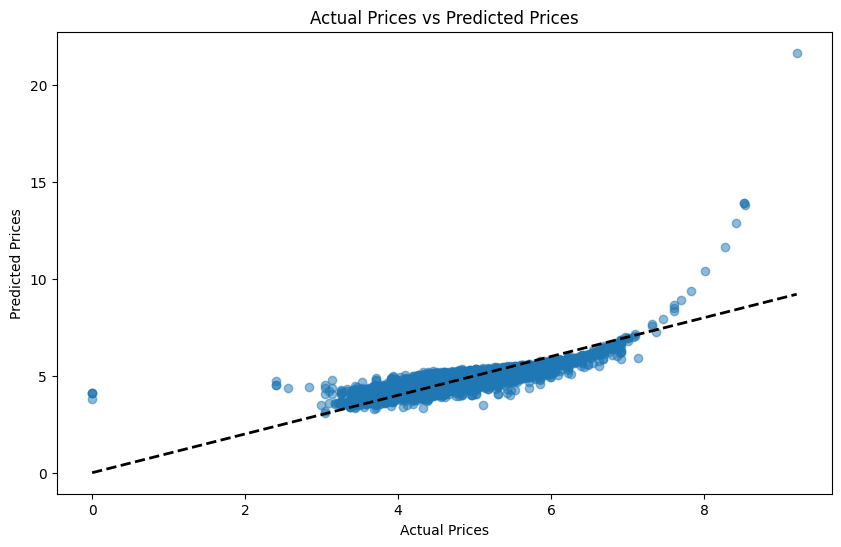

In [141]:
# Ploteo de los valores predichos de los reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()